In [1]:
import os
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import cohen_kappa_score, precision_score
from sklearn.metrics import matthews_corrcoef, mean_squared_error, log_loss
from sklearn.metrics import f1_score, recall_score, roc_auc_score
import numpy as np

In [2]:
# Reading data

path_data = '../data/processed'
file_name = 'data_model.csv'

file_path = os.path.join(path_data, file_name)

df = pd.read_csv(file_path)

In [3]:
df.head()

,initial_quantity,listing_type_id,seller_city,price,base_price,available_quantity,week_day,sold_quantity,seller_state,garantia_aplica,...,month_stop,tarjeta_de_credito,dragged_bids_and_visits,transferencia_bancaria,shipping_local_pick_up,efectivo,automatic_relist,days_active,acordar_con_el_comprador,condition
0,1,0,2043,80.0,80.0,1,2,0.0,1,1,...,10,False,1.0,True,True,True,False,60,True,0
1,1,6,380,2650.0,2650.0,1,2,0.0,1,1,...,10,False,0.0,True,True,True,False,60,False,1
2,1,0,344,60.0,60.0,1,6,0.0,1,1,...,10,True,1.0,True,True,True,False,60,False,1
3,1,6,946,580.0,580.0,1,4,0.0,1,1,...,11,True,0.0,True,True,True,False,66,False,0
4,1,0,2261,30.0,30.0,1,4,0.0,0,1,...,9,False,1.0,True,True,True,False,60,True,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   initial_quantity          100000 non-null  int64  
 1   listing_type_id           100000 non-null  int64  
 2   seller_city               100000 non-null  int64  
 3   price                     100000 non-null  float64
 4   base_price                100000 non-null  float64
 5   available_quantity        100000 non-null  int64  
 6   week_day                  100000 non-null  int64  
 7   sold_quantity             100000 non-null  float64
 8   seller_state              100000 non-null  int64  
 9   garantia_aplica           100000 non-null  int64  
 10  shipping_mode             100000 non-null  int64  
 11  month_start               100000 non-null  int64  
 12  month_stop                100000 non-null  int64  
 13  tarjeta_de_credito        100000 non-null  bo

In [5]:
X = df.drop(columns=['condition'], axis=1)
y = df['condition']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
params_xg_model = {
                'n_estimators': 800,
                'max_depth' : 15,                         
                'objective' : 'binary:logistic',         
                'reg_lambda' : 10,                       
                'gamma' : 0.3,                           
                'alpha' : 1,                             
                'learning_rate' : 0.10,                   
                'colsample_bytree' : 0.7,                 
                'scale_pos_weight' : 1,                  
                'subsample' : 0.1,                       
                'min_child_weight' : 3,                  
                'missing' : np.nan,                      
                'num_parallel_tree' : 2,                 
                'importance_type' : 'weight',
                'eval_metric' : 'auc',
                'verbosity' : 1,
                'nthread' : -1,                          
                'tree_method' : 'auto', # auto 
}

In [8]:
# train the model
model = xgb.XGBClassifier(**params_xg_model)

In [9]:
# fit model              
model.fit(X_train, Y_train.values.ravel(), eval_set=[(X_test, Y_test.values.ravel())], verbose=True)

[0]	validation_0-auc:0.89540
[1]	validation_0-auc:0.89396
[2]	validation_0-auc:0.88916
[3]	validation_0-auc:0.89757
[4]	validation_0-auc:0.90484
[5]	validation_0-auc:0.90555
[6]	validation_0-auc:0.90743
[7]	validation_0-auc:0.90754
[8]	validation_0-auc:0.90824
[9]	validation_0-auc:0.90987
[10]	validation_0-auc:0.90969
[11]	validation_0-auc:0.91048
[12]	validation_0-auc:0.91101
[13]	validation_0-auc:0.91125
[14]	validation_0-auc:0.91235
[15]	validation_0-auc:0.91297
[16]	validation_0-auc:0.91349
[17]	validation_0-auc:0.91370
[18]	validation_0-auc:0.91409
[19]	validation_0-auc:0.91427
[20]	validation_0-auc:0.91454
[21]	validation_0-auc:0.91477
[22]	validation_0-auc:0.91494
[23]	validation_0-auc:0.91584
[24]	validation_0-auc:0.91606
[25]	validation_0-auc:0.91661
[26]	validation_0-auc:0.91698
[27]	validation_0-auc:0.91738
[28]	validation_0-auc:0.91759
[29]	validation_0-auc:0.91794
[30]	validation_0-auc:0.91817
[31]	validation_0-auc:0.91859
[32]	validation_0-auc:0.91885
[33]	validation_0-au

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.3, grow_policy=None, importance_type='weight',
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None, nthread=-1, ...)

In [50]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     16162
           1       0.83      0.86      0.85     13838

    accuracy                           0.86     30000
   macro avg       0.86      0.86      0.86     30000
weighted avg       0.86      0.86      0.86     30000


In [51]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

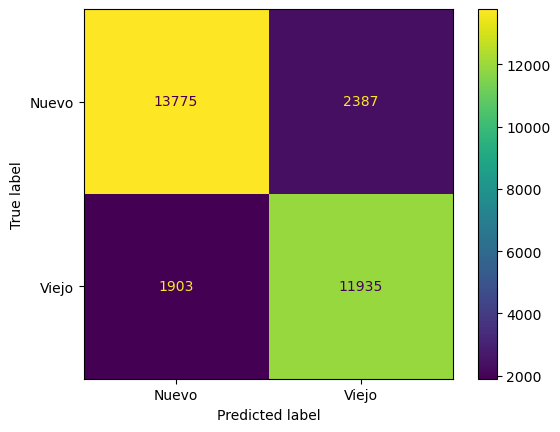

In [52]:
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Nuevo', 'Viejo'])

cm_display.plot()
plt.show()

In [53]:
metrics.accuracy_score(Y_test, y_pred)

0.857

In [54]:
accuracy = metrics.accuracy_score(Y_test, y_pred)
print(f"Accuracy Score: {round(accuracy,2)*100}%")

Accuracy Score: 86.0%


## 1. F1-Score

The **F1-Score** (or simply **F1**) is the **harmonic mean** between **Precision** (the percentage of predicted positive cases that are actually positive) and **Recall** (the percentage of actual positive cases that are correctly detected as positive).

It is defined as:

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- **Advantage**: It is very useful when classes are imbalanced, and we need a balance between how many positive cases we detect (Recall) and how many of the predicted positives are actually correct (Precision).
- **Interpretation**: A high F1 score indicates a good balance between the ability to find positives and the reliability of those positive predictions.

---

## 2. Recall (or Sensitivity)

**Recall**, also called **Sensitivity** or **True Positive Rate (TPR)**, is defined as:

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

where:
- **TP** (True Positives) are the actual positive cases that the model correctly identified as positive.  
- **FN** (False Negatives) are the actual positive cases that the model failed to identify (classified as negative).

- **Advantage**: It measures what **proportion of positive cases** we are capturing.
- **Interpretation**: A high Recall means the model **“forgets”** few positives (few FN).

---

## 3. ROC Curve and AUC Metric

### 3.1. ROC Curve

The **ROC Curve** (Receiver Operating Characteristic) is a graphical representation of the relationship between:
- **TPR** (True Positive Rate) or Recall: the proportion of actual positives correctly classified.  
- **FPR** (False Positive Rate): the proportion of actual negatives that were misclassified as positives, defined as:

$$
\text{FPR} = \frac{\text{FP}}{\text{TN} + \text{FP}}
$$

where:
- **FP** (False Positives) are actually negative cases that the model predicted as positive.  
- **TN** (True Negatives) are actually negative cases predicted as negative.

The ROC curve is obtained by varying the model's **decision threshold** (default is 0.5) and calculating the \((\text{FPR}, \text{TPR})\) pairs for each threshold.

### 3.2. AUC (Area Under the Curve)

The **AUC (Area Under the Curve)** is the area under the ROC curve.  
- **Interpretation**:  
  - A value of 0.5 corresponds to a model that performs **no better** than random guessing.  
  - A value of 1.0 corresponds to a perfect model.  
  - The higher the AUC, the better the model's **discriminative power** between positive and negative classes.

---

## 4. When to Use Each Metric?

- **F1-Score**:  
  - Very useful when there is **class imbalance**, and you need a balance between how many positives you detect and how precise those positives are.  
  - Recommended if **False Negatives** and **False Positives** have a **similar cost**.

- **Recall**:  
  - Crucial if **False Negatives are very costly**. For example, in disease detection, missing a positive case can be severe.

- **ROC / AUC**:  
  - Provides a global view of the model's performance across all thresholds.  
  - Very useful for **comparing two models** without fixing a single cutoff point.  
  - However, in highly imbalanced datasets, the **Precision-Recall (PR) curve** may be more informative than ROC.

---

## Why Adjust the Threshold?

By default, classification models use 0.5 as the decision threshold:
- If the probability is greater than or equal to 0.5, class 1 is assigned.  
- Otherwise, class 0 is assigned.

However, sometimes it is beneficial to adjust this threshold. For example:
- If we care more about **precision** when predicting a “positive” case, we might increase the threshold.
- If we want to **detect all positive cases**, even at the cost of more false positives, we might lower the threshold.

---

## 2. First Part: F1-Score vs. Threshold

### Calculating the F1-Score for Each Threshold

1. **Generate a list of thresholds** within a range (e.g., from 0.05 to 0.95) in small increments.  
2. **For each threshold**, convert probabilities into class 0 or 1 using `np.where(probability < threshold, 0, 1)`.  
3. **Compute** the F1-Score by comparing these predictions with the actual labels (`Y_test`).

This produces a table (`DataFrame`) with two columns:

- `threshold`: the tested threshold.  
- `f1_score`: the F1 score obtained using that threshold.

---

## 3. Third Part: ROC Curve and G-Mean

### 4.1. ROC Curve and AUC

The **ROC Curve (Receiver Operating Characteristic)** plots the TPR (True Positive Rate) against the FPR (False Positive Rate) while adjusting the decision threshold from 0 to 1. This generates multiple (FPR, TPR) points for different thresholds.

The most common metric for the ROC curve is **AUC (Area Under the Curve)**, which indicates how well the model ranks positive cases over negative ones.

### 4.2. The G-Mean

For each point on the ROC curve (each threshold), we can compute the **G-Mean**:

$$
\text{G-Mean} = \sqrt{\text{TPR} \times (1 - \text{FPR})}
$$

This measures the balance between detecting the positive class (TPR) and avoiding false positives (1 - FPR). **The higher the G-Mean, the better the model’s balance**.

We find the index where the G-Mean is **maximized**; this index corresponds to an optimal threshold. We mark this threshold on the ROC curve to visually identify the best trade-off point.



In [39]:
 np.linspace(0.3, 0.6, 200)


array([0.3       , 0.30150754, 0.30301508, 0.30452261, 0.30603015,
       0.30753769, 0.30904523, 0.31055276, 0.3120603 , 0.31356784,
       0.31507538, 0.31658291, 0.31809045, 0.31959799, 0.32110553,
       0.32261307, 0.3241206 , 0.32562814, 0.32713568, 0.32864322,
       0.33015075, 0.33165829, 0.33316583, 0.33467337, 0.3361809 ,
       0.33768844, 0.33919598, 0.34070352, 0.34221106, 0.34371859,
       0.34522613, 0.34673367, 0.34824121, 0.34974874, 0.35125628,
       0.35276382, 0.35427136, 0.35577889, 0.35728643, 0.35879397,
       0.36030151, 0.36180905, 0.36331658, 0.36482412, 0.36633166,
       0.3678392 , 0.36934673, 0.37085427, 0.37236181, 0.37386935,
       0.37537688, 0.37688442, 0.37839196, 0.3798995 , 0.38140704,
       0.38291457, 0.38442211, 0.38592965, 0.38743719, 0.38894472,
       0.39045226, 0.3919598 , 0.39346734, 0.39497487, 0.39648241,
       0.39798995, 0.39949749, 0.40100503, 0.40251256, 0.4040201 ,
       0.40552764, 0.40703518, 0.40854271, 0.41005025, 0.41155

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, brier_score_loss, roc_curve, roc_auc_score, accuracy_score
from numpy import sqrt, argmax

def compute_metric_by_threshold(pred_probs, y_true, metric_func, thresholds=None):
    """
    Computes a metric (F1, Brier, etc.) for a range of thresholds.
    
    Parameters:
    -----------
    pred_probs: np.array
        Estimated probabilities for the positive class (e.g., model output).
    y_true: np.array
        True labels (0 or 1).
    metric_func: function
        Function that takes (y_true, y_pred) and returns a numeric value (e.g., f1_score).
    thresholds: list or None
        List of thresholds. If None, a default range is used.
    
    Returns:
    --------
    df_metric: pd.DataFrame
        DataFrame with columns: ['threshold', 'metric_value']
    """
    if thresholds is None:
        thresholds = np.linspace(0.3, 0.6, 500)
    
    metric_values = []
    for thr in thresholds:
        # Generate binary predictions based on the threshold
        pred_labels = np.where(pred_probs < thr, 0, 1)
        
        # Compute the metric
        m_value = metric_func(y_true, pred_labels)
        metric_values.append(m_value)
    
    df_metric = pd.DataFrame({'threshold': thresholds, 'metric_value': metric_values})
    return df_metric

def plot_metric_threshold(df_metric, metric_name, maximize=True):
    """
    Plots a 'threshold vs. metric' curve and displays the best threshold in the title.
    
    Parameters:
    -----------
    df_metric: pd.DataFrame
        DataFrame with columns ['threshold', 'metric_value'].
    metric_name: str
        Name of the metric (for the plot title).
    maximize: bool
        If True, we find the threshold that maximizes the metric.
        If False, we find the threshold that minimizes the metric.
    
    Returns:
    --------
    best_threshold: float
        The best threshold value.
    best_metric_value: float
        The corresponding metric value.
    """
    if maximize:
        best_metric_value = df_metric['metric_value'].max()
        best_df = df_metric[df_metric['metric_value'] == best_metric_value]
    else:
        best_metric_value = df_metric['metric_value'].min()
        best_df = df_metric[df_metric['metric_value'] == best_metric_value]
    
    best_threshold = best_df['threshold'].values[0]
    
    # Title
    title = (f"Best Threshold: {round(best_threshold, 2)} / "
             f"{metric_name}: {round(best_metric_value, 3)}")
    
    # Plot
    sns.lineplot(data=df_metric, x='threshold', y='metric_value')
    plt.title(title)
    plt.xlabel("Threshold")
    plt.ylabel(metric_name)
    plt.show()
    
    return best_threshold, best_metric_value


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


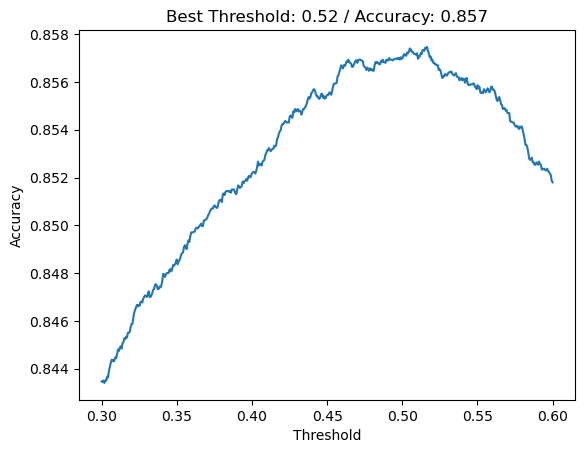

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


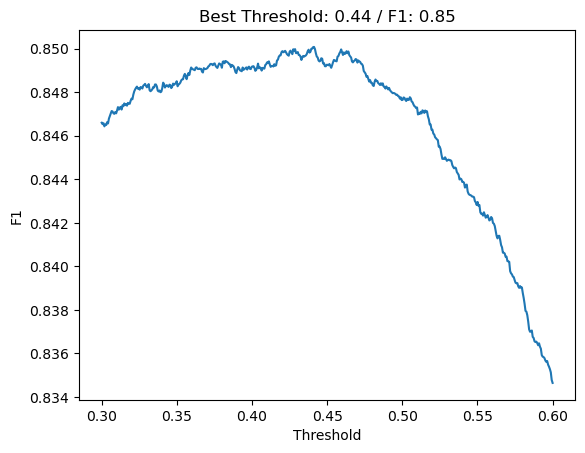

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


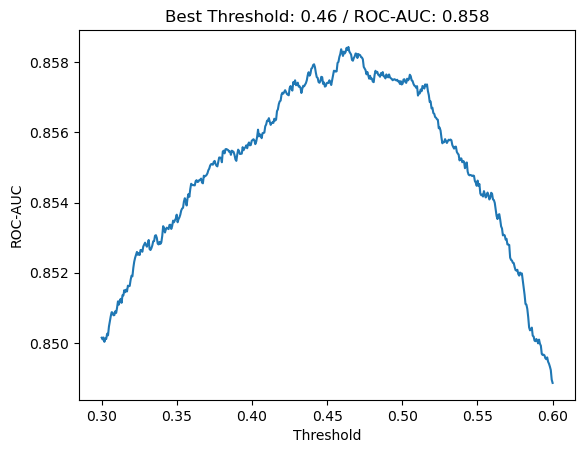

In [ ]:

pred_test = model.predict_proba(X_test)
pred_probs = pred_test[:, 1]


df_accuracy = compute_metric_by_threshold(pred_probs, Y_test, accuracy_score)
df_f1 = compute_metric_by_threshold(pred_probs, Y_test, f1_score)
df_roc = compute_metric_by_threshold(pred_probs, Y_test, roc_auc_score)


best_thr_accuracy, best_accuracy = plot_metric_threshold(df_accuracy, metric_name="Accuracy", maximize=True)
best_thr_f1, best_f1 = plot_metric_threshold(df_f1, metric_name="F1", maximize=True)
best_thr_roc, best_roc = plot_metric_threshold(df_roc, metric_name="ROC-AUC", maximize=True)

In [37]:
print(f"Mejor umbral según Accuracy: {best_thr_accuracy:.2f}, con F1: {best_accuracy:.3f}")
print(f"Mejor umbral según F1: {best_thr_f1:.2f}, con F1: {best_f1:.3f}")
print(f"Mejor umbral según ROC: {best_thr_roc:.2f}, con F1: {best_roc:.3f}")

Mejor umbral según Accuracy: 0.52, con F1: 0.857
Mejor umbral según F1: 0.43, con F1: 0.850
Mejor umbral según ROC: 0.46, con F1: 0.858


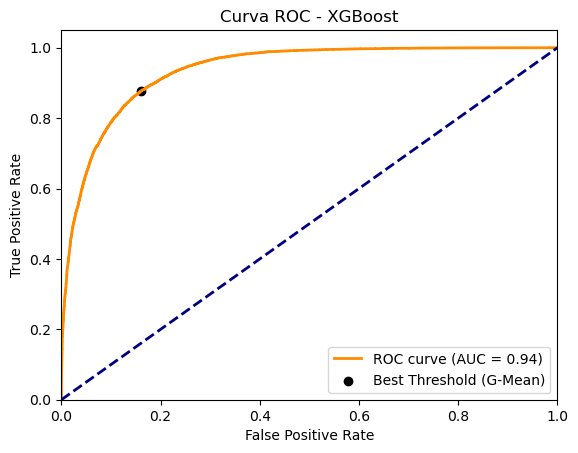

In [42]:
fpr, tpr, thresholds = roc_curve(Y_test, pred_probs)
roc_auc = roc_auc_score(Y_test, pred_probs)


gmeans = np.sqrt(tpr * (1 - fpr))
max_gmeans = argmax(gmeans)

best_thr_gmean = thresholds[max_gmeans]
best_gmean = gmeans[max_gmeans]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw,
         label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.scatter(fpr[max_gmeans], tpr[max_gmeans], marker='o', color='black', 
            label='Best Threshold (G-Mean)')
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - XGBoost")
plt.legend(loc="lower right")
plt.show()

In [43]:
roc_auc_score(Y_test, pred_probs)

0.9355872514343365

In [29]:
def to_labels_max(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [65]:
import os
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, precision_score, matthews_corrcoef,
                             mean_squared_error, log_loss, f1_score, recall_score, roc_auc_score)
import numpy as np

class XGBoostClassifierModel:
    def __init__(self, data_path, file_name, params_model):
        """
        Initializes the model with data path and file name.
        """
        self.data_path = data_path
        self.file_name = file_name
        self.params_model = params_model
        self.model = None
    
    def load_data(self):
        """
        Loads data from the specified CSV file.
        """
        file_path = os.path.join(self.data_path, self.file_name)
        df = pd.read_csv(file_path)
        return df
    
    def preprocess_data(self, df):
        """
        Prepares the dataset by splitting into features and labels.
        """
        X = df.drop(columns=['condition'], axis=1)
        y = df['condition']
        return train_test_split(X, y, test_size=0.3, random_state=42)
    
    def train_model(self, X_train, Y_train):
        """
        Trains an XGBoost Classifier.
        """
        self.model = xgb.XGBClassifier(**self.params_model)
        self.model.fit(X_train, Y_train)
    
    def evaluate_model(self, X_test, Y_test):
        """
        Evaluates the trained model using multiple metrics.
        """
        Y_pred = self.model.predict(X_test)
        Y_proba = self.model.predict_proba(X_test)[:, 1]
        
        metrics = {
            'Accuracy': accuracy_score(Y_test, Y_pred),
            'Precision': precision_score(Y_test, Y_pred),
            'MCC': matthews_corrcoef(Y_test, Y_pred),
            'Mean Squared Error': mean_squared_error(Y_test, Y_pred),
            'Log Loss': log_loss(Y_test, Y_proba),
            'F1 Score': f1_score(Y_test, Y_pred),
            'Recall': recall_score(Y_test, Y_pred),
            'ROC AUC': roc_auc_score(Y_test, Y_proba)
        }
        return metrics
    
    def optimize_hyperparameters(self, X_train, Y_train):
        """
        Uses GridSearchCV to find the best hyperparameters for XGBoost.
        """
        param_grid = {
            'n_estimators': [100,200, 800],
            'max_depth': [10, 15,20, 30],
            'learning_rate': [0.01, 0.1, 0.2],
            'gamma': [0, 0.3, 0.5],
            'reg_lambda': [1, 10]
        }
        grid_search = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic', random_state=42),
                                   param_grid, scoring='accuracy', cv=3, verbose=1)
        grid_search.fit(X_train, Y_train)
        self.model = grid_search.best_estimator_
        return grid_search.best_params_

In [66]:
params_xg_model = {
                'n_estimators': 800,
                'max_depth' : 15,                         
                'objective' : 'binary:logistic',         
                'reg_lambda' : 10,                       
                'gamma' : 0.3,                           
                'alpha' : 1,                             
                'learning_rate' : 0.10,                   
                'colsample_bytree' : 0.7,                 
                'scale_pos_weight' : 1,                  
                'subsample' : 0.1,                       
                'min_child_weight' : 3,                  
                'missing' : np.nan,                      
                'num_parallel_tree' : 2,                 
                'importance_type' : 'weight',
                'eval_metric' : 'auc',
                'verbosity' : 1,
                'nthread' : -1,                          
                'tree_method' : 'auto', # auto 
}

model = XGBoostClassifierModel('../data/processed', 'data_model.csv', params_xg_model)
df = model.load_data()
X_train, X_test, Y_train, Y_test = model.preprocess_data(df)
model.train_model(X_train, Y_train)
print(model.evaluate_model(X_test, Y_test))
best_params = model.optimize_hyperparameters(X_train, Y_train)
print("Best Hyperparameters:", best_params)

{'Accuracy': 0.857, 'Precision': 0.8333333333333334, 'MCC': 0.7133691242801055, 'Mean Squared Error': 0.143, 'Log Loss': 0.3201051056046941, 'F1 Score': 0.84765625, 'Recall': 0.8624801271860095, 'ROC AUC': 0.9355872514343365}
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 800, 'reg_lambda': 10}


In [67]:
model.evaluate_model(X_test, Y_test)

{'Accuracy': 0.8659333333333333,
 'Precision': 0.8414498399888688,
 'MCC': 0.7314671755014365,
 'Mean Squared Error': 0.13406666666666667,
 'Log Loss': 0.3075661151983684,
 'F1 Score': 0.8574365518219197,
 'Recall': 0.8740424916895505,
 'ROC AUC': 0.9414350534770984}

Model Performance Conclusions

From the metrics dictionary, we can draw the following conclusions about the model’s performance:

Precision ≈ 0.84 and Recall ≈ 0.87
The model correctly identifies most positive cases (high recall) and, when predicting a positive, it is usually correct (high precision).

F1 Score ≈ 0.86
This metric combines precision and recall into a single indicator. A value close to 0.86 suggests a good balance between catching positive cases and making correct positive predictions.

ROC AUC ≈ 0.94
The Area Under the ROC Curve is quite high, indicating the model does a very good job separating the two classes across a range of decision thresholds.

Log Loss ≈ 0.30 and MSE ≈ 0.1354
These metrics are useful when working with probabilistic predictions. The relatively low values suggest that the predicted probabilities are close to the true outcomes.

Cohen’s Kappa ≈ 0.73 and MCC (Matthews Correlation Coefficient) ≈ 0.73
Both reflect the agreement between the model’s predictions and the actual values, correcting for chance. Scores above 0.7 are typically considered substantial.


For a secondary metric based:

F1 Score if you care about balancing precision and recall.

ROC AUC if you need to assess the model’s performance across multiple decision thresholds or emphasize ranking capabilities.

## RUN MODEL WITH THE BEST HYPER

In [69]:
params_xg_model_best = {
                'n_estimators': 800,
                'max_depth' : 10,                         
                'objective' : 'binary:logistic',         
                'reg_lambda' : 10,                       
                'gamma' : 0,                           
                'alpha' : 1,                             
                'learning_rate' : 0.1,                   
                'colsample_bytree' : 0.7,                 
                'scale_pos_weight' : 1,                  
                'subsample' : 0.1,                       
                'min_child_weight' : 3,                  
                'missing' : np.nan,                      
                'num_parallel_tree' : 2,                 
                'importance_type' : 'weight',
                'eval_metric' : 'auc',
                'verbosity' : 1,
                'nthread' : -1,                          
                'tree_method' : 'auto', # auto 
}

model = XGBoostClassifierModel('../data/processed', 'data_model.csv', params_xg_model_best)
df = model.load_data()
X_train, X_test, Y_train, Y_test = model.preprocess_data(df)
model.train_model(X_train, Y_train)

In [71]:
model.evaluate_model(X_test, Y_test)

{'Accuracy': 0.8556,
 'Precision': 0.8317743962027083,
 'MCC': 0.7105699958156938,
 'Mean Squared Error': 0.1444,
 'Log Loss': 0.3190888821034051,
 'F1 Score': 0.8461866212185769,
 'Recall': 0.8611070964012141,
 'ROC AUC': 0.9360135519217825}

# MLFLOW

In [75]:
import mlflow
import mlflow.xgboost

In [76]:
class XGBoostClassifierModel:
    def __init__(self, data_path, file_name, params_model):
        """
        Initializes the model with data path and file name.
        """
        self.data_path = data_path
        self.file_name = file_name
        self.params_model = params_model
        self.model = None
    
    def load_data(self):
        """
        Loads data from the specified CSV file.
        """
        file_path = os.path.join(self.data_path, self.file_name)
        df = pd.read_csv(file_path)
        return df
    
    def preprocess_data(self, df):
        """
        Prepares the dataset by splitting into features and labels.
        """
        X = df.drop(columns=['condition'], axis=1)
        y = df['condition']
        return train_test_split(X, y, test_size=0.3, random_state=42)
    
    def train_model(self, X_train, Y_train):
        """
        Trains an XGBoost Classifier and logs in MLflow.
        """
        with mlflow.start_run():
            self.model = xgb.XGBClassifier(**self.params_model)
            self.model.fit(X_train, Y_train)
            
            # Log hyperparameters in MLflow
            mlflow.log_params(self.params_model)
    
    def evaluate_model(self, X_test, Y_test):
        """
        Evaluates the trained model using multiple metrics and logs in MLflow.
        """
        Y_pred = self.model.predict(X_test)
        Y_proba = self.model.predict_proba(X_test)[:, 1]
        
        metrics = {
            'Accuracy': accuracy_score(Y_test, Y_pred),
            'Precision': precision_score(Y_test, Y_pred),
            'MCC': matthews_corrcoef(Y_test, Y_pred),
            'Mean Squared Error': mean_squared_error(Y_test, Y_pred),
            'Log Loss': log_loss(Y_test, Y_proba),
            'F1 Score': f1_score(Y_test, Y_pred),
            'Recall': recall_score(Y_test, Y_pred),
            'ROC AUC': roc_auc_score(Y_test, Y_proba)
        }
        
        # Log metrics in MLflow
        mlflow.log_metrics(metrics)
        
        # Save the model in MLflow
        mlflow.xgboost.log_model(self.model, artifact_path="xgboost_model")
        
        return metrics
    
    def optimize_hyperparameters(self, X_train, Y_train):
        """
        Uses GridSearchCV to find the best hyperparameters for XGBoost and logs the results in MLflow.
        """
        param_grid = {
            'n_estimators': [100, 200, 800],
            'max_depth': [10, 15, 20, 30],
            'learning_rate': [0.01, 0.1, 0.2],
            'gamma': [0, 0.3, 0.5],
            'reg_lambda': [1, 10]
        }
        
        grid_search = GridSearchCV(
            xgb.XGBClassifier(objective='binary:logistic', random_state=42),
            param_grid, scoring='accuracy', cv=3, verbose=1
        )
        
        with mlflow.start_run():
            grid_search.fit(X_train, Y_train)
            best_params = grid_search.best_params_
            self.model = grid_search.best_estimator_
            
            # Log best parameters in MLflow
            mlflow.log_params(best_params)
            mlflow.log_metric("Best Accuracy", grid_search.best_score_)
            
            # Save the best model
            mlflow.xgboost.log_model(self.model, artifact_path="best_xgboost_model")
        
        return best_params

In [ ]:
# Definir el path donde está el dataset
data_path = "ruta/al/dataset"
file_name = "datos.csv"

# Configurar hiperparámetros iniciales
params = {
    "n_estimators": 100,
    "max_depth": 10,
    "learning_rate": 0.1,
    "gamma": 0.3,
    "reg_lambda": 1,
    "use_label_encoder": False,
    "eval_metric": "logloss"
}

# Crear el modelo
xgb_model = XGBoostClassifierModel(data_path, file_name, params)

# Cargar y preparar los datos
df = xgb_model.load_data()
X_train, X_test, Y_train, Y_test = xgb_model.preprocess_data(df)

# Entrenar el modelo y optimizar hiperparámetros
xgb_model.train_model(X_train, Y_train)
best_params = xgb_model.optimize_hyperparameters(X_train, Y_train)

# Evaluar el modelo
metrics = xgb_model.evaluate_model(X_test, Y_test)

# Mostrar métricas
print("Best Hyperparameters:", best_params)
print("Model Metrics:", metrics)